# Código Regresion Logística
POr Liceth Mosquera

## Librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression,LogisticRegressionCV
from sklearn import metrics,model_selection,svm
from sklearn.metrics import roc_curve, roc_auc_score,auc,classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score,precision_recall_fscore_support

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

from sklearn.preprocessing import StandardScaler


## Explorando los datos

In [2]:
Data = pd.read_excel('Data.xlsx')
Data = Data.set_index('Date')

In [3]:
df1 = Data.dropna(axis=0,how='any')
#Data.isnull().any();
#Data = Data.fillna(method='ffill')
Y = df1['Class']
X = df1.drop('Class', axis = 1)

In [70]:
df1.shape
len(X)
#len(df1.columns)
X.shape[0]

4075

## 1. Error real deseado $\epsilon$ 

In [71]:
Epsilon = 0.2
delta = 0.1
h_aprox = 2**len(df1.columns)
dimVC =h_aprox   # Poner aqui la dimVC
h_aprox

295147905179352825856

## 2. Error de entrenamiento deseado $\delta$.

## 3. Garantia probable de aprendizaje

In [72]:
import math
from math import exp, expm1, log
def n_est(Epsilon,delta,h_aprox):
    return int(np.ceil((1/Epsilon)*(math.log(h_aprox,2)) + np.log(1/delta)))
     
n=n_est(Epsilon,delta,h_aprox)
step=10

n

343

## 4. Tamaño óptimo de la muestra

In [68]:
#int_log=math.log(2*2**h_aprox,2)
#no lo resuelve python

In [73]:
def n_opt(Epsilon,delta,int_log):
    return int(math.ceil((2/(Epsilon))*(int_log + np.log(2/delta))))
int_log=48.52030264
n_2=n_opt(Epsilon,delta,int_log)
n_2

516

## 5. Dividir el conjunto de muestra en: entrenamiento, validación y prueba.

In [8]:
Xa_tr, Xa_t, Ya_tr, Ya_t = train_test_split(X, Y,test_size= 0.4, train_size = 0.6, random_state=19)
Xa_va, Xa_ts, Ya_va, Ya_ts = train_test_split(Xa_t, Ya_t, test_size = 0.5, train_size = 0.5, random_state=19)

##  6. Visualizar los datos con los algoritmos de visualización por defecto de la suite, extraer caracterısticas si hace falta para aumentar la dimensionalidad

In [9]:
df1.corr();#no funciona porque el target es categórico

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


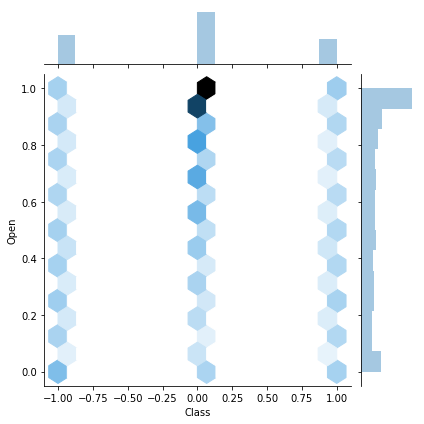

In [10]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

%matplotlib inline
sns.jointplot(x="Class",y="Open",data=df1,kind='hex') #kind='hex' kind='kde'

### 8.	Entrenar el modelo con los datos en altas dimensiones (espacio original)

In [11]:
Accuracy= []
scores=[]
LR_m=LogisticRegression(multi_class="multinomial",solver ="newton-cg") 
for i in range (n,int(len(df1)*0.6),step):
    X1_tr, X1_t, Y1_tr, Y1_t = train_test_split(X, Y,test_size= i/X.shape[0]*0.4/0.6, train_size = i/X.shape[0], random_state=19)
    X1_va, X1_ts, Y1_va, Y1_ts = train_test_split(X1_t, Y1_t, test_size = 0.5, train_size = 0.5, random_state=19)
    model = LR_m.fit(X1_tr, Y1_tr)
    predictions = LR_m.predict(X1_ts)
    Accuracy.append(LR_m.score(X1_ts, Y1_ts))
    scores.append(cross_val_score(model, X1_ts, Y1_ts, cv=3))
len(Accuracy)

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


242

In [76]:
n_bst = np.where(Accuracy == np.amax(Accuracy))[0]
M_N=n+n_bst[0]*step
print('El tamaño de los datos para entrenar con el que se obtiene el mejor modelo es {0}'.format(M_N))

El tamaño de los datos para entrenar con el que se obtiene el mejor modelo es 543


In [12]:
a = []
for i in range(0,len(scores)): #len(N)-1
    i=n+i*step
    a.append(i)
N=list(range(len(scores)))

In [13]:
Accuracy;

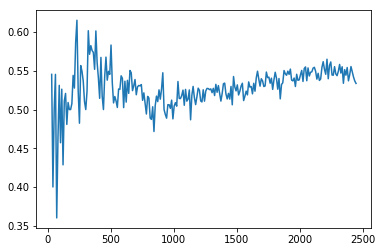

In [14]:
plt.plot(a,Accuracy)

In [77]:
M_N=n+n_bst[0]*step
n_bst
print('El tamaño de los datos para entrenar con el que se obtiene el mejor modelo es {0}'.format(M_N))

El tamaño de los datos para entrenar con el que se obtiene el mejor modelo es 543


In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_ts, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(Y1_ts, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_ts, predictions)))

Mean Absolute Error: 0.5533742331288344
Mean Squared Error: 0.7276073619631902
Root Mean Squared Error: 0.8529990398372029


In [16]:
# Binarize the output no se utiliza
y = label_binarize(Y, classes=[-1, 0, 1])
n_classes = y.shape[1]
n_classes

3

In [17]:
Xb_tr, Xb_o, Yb_tr, Yb_o = train_test_split(X, Y,test_size=0.4,train_size=0.6,random_state=19)  
Xb_va, Xb_ts, Yb_va, Yb_ts = train_test_split(Xb_o, Yb_o, test_size=0.5, train_size = 0.5, random_state=19)  

In [18]:
logreg = LogisticRegression()
logreg.fit(Xb_tr, Yb_tr)

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# use the model to make predictions with the test data
y_pred = model.predict(Xb_ts)
# how did our model perform?
count_misclassified = (Yb_ts != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Yb_ts, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 380
Accuracy: 0.53


In [20]:
y_pred_lg=logreg.predict(Xb_ts)
Precision=precision_score(y_pred_lg, Yb_ts, average='macro')  
Recall=recall_score(Yb_ts, y_pred_lg, average='micro')
#f1_score=f1_score(Yb_ts, y_pred_lg, average='weighted')  
#fbeta_score=fbeta_score(Yb_ts, y_pred_lg, average='macro', beta=0.5)  
#precision_recall_fscore_support=precision_recall_fscore_support(Yb_ts, y_pred_lg, beta=0.5, average=None)


In [21]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Yb_ts, y_pred_lg)
cnf_matrix

array([[ 52, 114,  15],
       [ 47, 354,  23],
       [ 57, 125,  28]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

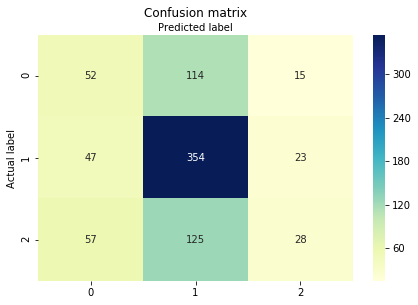

In [22]:
class_names=[-1,0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
print("Accuracy:",metrics.accuracy_score(Yb_ts, y_pred_lg))
print("Precision:",metrics.precision_score(Yb_ts, y_pred_lg,average="micro"))
print("Recall:",metrics.recall_score(Yb_ts, y_pred_lg,average="micro"))

Accuracy: 0.5325153374233129
Precision: 0.5325153374233129
Recall: 0.5325153374233129


In [24]:
#INTENTANDO QUE RECONOZCA TRES ESTADOS
LR_m=LogisticRegression(multi_class="multinomial",solver ="newton-cg").fit(Xb_tr, Yb_tr,)
#
y_pred_LM=LR_m.predict( Xb_o,)

In [25]:
cnf_matrix_m = metrics.confusion_matrix(Yb_o, y_pred_LM)
cnf_matrix_m

array([[136, 228,  49],
       [109, 667,  39],
       [103, 228,  71]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

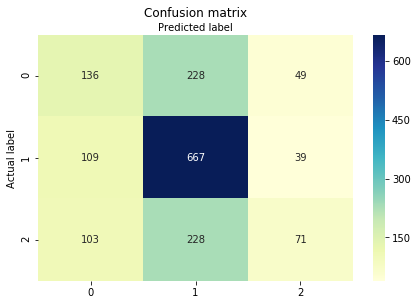

In [26]:
class_names=[-1,0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score
from sklearn.metrics import f1_score,fbeta_score,precision_recall_fscore_support

In [28]:
Precision=precision_score(y_pred_LM, Yb_o, average='macro')  
Recall=recall_score(Yb_o, y_pred_LM, average='micro')
f1_score=f1_score(Yb_o, y_pred_LM, average='weighted')  
fbeta_score=fbeta_score(Yb_o, y_pred_LM, average='macro', beta=0.5)  
precision_recall_fscore_support=precision_recall_fscore_support(Yb_o, y_pred_LM, beta=0.5, average=None)

In [29]:
print('precisión:' , Precision)
print('Recall:' ,Recall)
print('f1_score  :' , f1_score)
print('fbeta_score  :' , fbeta_score)
print('precision_recall_fscore_support:' ,precision_recall_fscore_support)


precisión: 0.44143988140719675
Recall: 0.5361963190184049
f1_score  : 0.497157163851381
fbeta_score  : 0.44905015201668447
precision_recall_fscore_support: (array([0.3908046 , 0.59394479, 0.44654088]), array([0.32929782, 0.81840491, 0.17661692]), array([0.3767313 , 0.6284153 , 0.34200385]), array([413, 815, 402], dtype=int64))


In [30]:
target_names = ['Vender', 'Esperar', 'Comprar']
print(classification_report(Yb_o, y_pred_LM, target_names=target_names))

              precision    recall  f1-score   support

      Vender       0.39      0.33      0.36       413
     Esperar       0.59      0.82      0.69       815
     Comprar       0.45      0.18      0.25       402

    accuracy                           0.54      1630
   macro avg       0.48      0.44      0.43      1630
weighted avg       0.51      0.54      0.50      1630



# curvas ROC

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7,random_state=19)  
Xb_va, Xb_ts, Yb_va, Yb_ts = train_test_split(Xb_o, Yb_o, test_size=0.5, train_size = 0.5, random_state=19) 

In [32]:
classifier2 = OneVsRestClassifier((LogisticRegression(
    multi_class="multinomial",solver ="newton-cg") ))
y_score = classifier2.fit(X_train, y_train).predict_proba(X_test)

In [33]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])

In [34]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

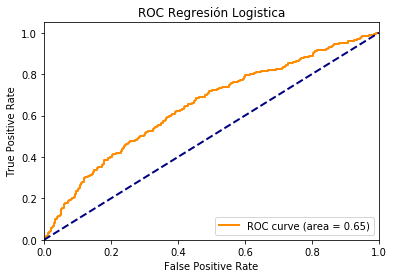

In [35]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Regresión Logistica')
plt.legend(loc="lower right")
plt.show()

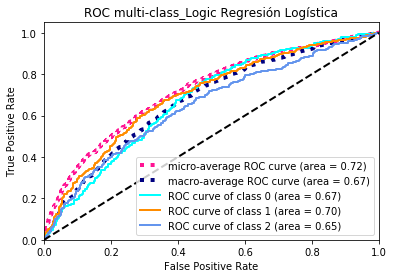

In [37]:
from scipy import interp
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr['micro'], tpr['micro'],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['micro']),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr['macro'], tpr['macro'],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['macro']),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC multi-class_Logic Regresión Logística')
plt.legend(loc="lower right")
plt.show()